![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 1: Pandas and Common data formats

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-05)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Session_1/01_Pandas_Introduction_Common_Data_Formats.ipynb)

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:

Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
Ordered and unordered (not necessarily fixed-frequency) time series data.
Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure
The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

## A good note about mutability and copying of data
All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.

[Source](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

# Pandas functionality introduction: a 101, step by step guide

As you already know, we start by importing the necessary libraries. In this case will be Numpy and Pandas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Within IPython notebook, add multiple print capabilities
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
%matplotlib inline

## Series and DataFrames

Pandas has two main types of Data Structures, i.e. Series and DataFrames, which are one and two dimensional arrays respectively. The best way to think about the pandas data structures is as flexible containers for lower dimensional data. For example, DataFrame is a container for Series, and Series is a container for scalars. We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.

[Source](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

### Series

Series are 1-D arrays. In the following cell we create some dummy data, containing NaN values and different digit values. Then we invoke the variable to see the results. In a nutshell, series are **containers for scalars**

In [ ]:
 s = pd.Series([0, 1, 5, np.nan, 6, 81])

As we can see printed below by invoking variable **"s"**, series have only one Data Type, while DataFrames can have many.

In [ ]:
s

0     0.0
1     1.0
2     5.0
3     NaN
4     6.0
5    81.0
dtype: float64

### DataFrames

DataFrames, and actually pandas as a whole, is the pythonic reaction to the R language. DataFrames replicates the functionalities of R *data.frames* tables. Pandas DataFrames are 2D tabular structures.

Here we will use Pandas *date_range* method to populate our first DataFrame. The *date_range* method will provide us with some timestamps that will be our **indexes** or *rows*. We will create 6 of them.

In [ ]:
dates = pd.date_range('20191208', periods=6)
dates

DatetimeIndex(['2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13'],
              dtype='datetime64[ns]', freq='D')

Then we create fake data using **numpy** *random.randn* method, providing an array equal to the number of indexes/rows (in this case 6) and the number of columns, which we will keep at 5 characters from *A* to *E*.

Then we pass the fake data to the pandas DataFrame, together with the indexes and columns. And then we have our first pandas DataFrame!!

In [ ]:
df = pd.DataFrame(np.random.randn(6, 5), index=dates, columns=list('ABCDE'))
df

,A,B,C,D,E
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892
2019-12-11,0.343328,-0.280366,-0.972104,0.914802,-1.076782
2019-12-12,1.229212,-0.291337,-1.592137,-1.501020,-0.096786
2019-12-13,-1.027193,0.230419,0.230318,-1.158879,0.028654


## Viewing, quick summaries and transformations of the data frame

### Viewing the components of a DataFrame 
To quickly view the top rows of our dataset, we can use the **head()** method, which will display few lines at the top of our DataFrame. We can select the number of rows to be printed, within the method **head(n)**

In [ ]:
df.head()

,A,B,C,D,E
2019-12-08,-2.048506,-0.245143,1.113793,-1.867144,-0.676383
2019-12-09,1.484441,-0.231305,1.030252,0.358957,-0.291532
2019-12-10,-0.719532,0.611947,-1.238926,0.726177,-0.954022
2019-12-11,0.211022,1.164074,-0.142397,-1.717378,0.724267
2019-12-12,-1.256414,0.346683,0.532989,-0.208281,0.549166


To display the last rows of the DataFrame, use the method **tail()**. We can as well specify the number of rows to be printed:

In [ ]:
df.tail(2)

,A,B,C,D,E
2019-12-12,-0.286768,0.302793,0.042120,-0.991011,0.411346
2019-12-13,-0.000706,-0.377966,0.106445,-1.453660,0.210401


To print the index/rows simply do the following:

In [ ]:
df.index

DatetimeIndex(['2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

### Quick summaries and transformations of the DataFrame

Python Pandas allows for very quick DataFrame summaries and transformations to aid in ETL (Extract Transform Load) and exploratory tasks.

For instance, if we want to transpose the DataFrame (changing the rows by the columns), we can use the following method:

In [ ]:
df.T

,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00
A,1.381843,-1.981175,-0.153945,-1.886251,-0.543642,-0.513712
B,-1.960732,-0.876572,0.378060,-0.526569,1.273038,0.715614
C,-1.079255,1.399260,1.711884,0.501413,0.712607,0.663741
D,0.242728,-0.264012,-1.105884,-0.875845,-0.020632,0.232887
E,0.571902,0.523527,0.162734,1.739303,0.030064,1.520726


We can as well pass our DataFrame as a [NumPy](https://numpy.org/) array.

In [ ]:
df.to_numpy()

array([[ 0.47551948, -1.09069474,  0.26572951, -0.76045147,  0.87233216],
       [-1.12311682, -0.55378582,  0.87195299, -0.14027247,  2.59050097],
       [ 0.12534816, -0.28825733,  1.10561535,  0.32717054,  0.99001645],
       [-0.20980696,  0.99384602,  2.47480337, -0.08265069,  1.02785119],
       [ 0.05102118,  0.95020597,  0.35605069, -1.15540703, -0.55041661],
       [ 0.85198643, -0.50978048, -0.81129171,  1.76360391, -0.02655716]])

#### Quick descriptive statistics

One of the most powerful methods for data analytics prototyping is the pandas **describe()** method. This method generates descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset distribution, excluding *NaN* values.

The describe method returns a series of descriptive statistics for the Series or DataFrame. And as well the percentiles. By default, the lower is set to 25%, the upper to 75%, being the 50% percentile the same as the median.

In [ ]:
df.describe()

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.008380,-0.197217,0.029365,-0.519278,0.656881
std,1.036752,0.414874,1.187543,0.659247,0.929238
min,-1.017090,-0.650234,-1.155460,-1.453660,-0.223584
25%,-0.773214,-0.561660,-0.808861,-0.899682,0.052653
50%,-0.143737,-0.213895,0.074282,-0.498145,0.310874
75%,0.396146,0.148660,0.144069,-0.149690,1.110510
max,1.761774,0.302793,2.118995,0.401349,2.199486


The default percentiles are the following: `[.25, .5, .75]`. We can modify the percentiles if we see fit by passing a list of the percentiles that we want to have, it always needs to be between 0 and 1:

In [ ]:
df.describe(percentiles=[.10, .5, .90])

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.008380,-0.197217,0.029365,-0.519278,0.656881
std,1.036752,0.414874,1.187543,0.659247,0.929238
min,-1.017090,-0.650234,-1.155460,-1.453660,-0.223584
10%,-0.976226,-0.636563,-1.123991,-1.222336,-0.111757
50%,-0.143737,-0.213895,0.074282,-0.498145,0.310874
90%,1.145102,0.258808,1.137803,0.162647,1.771525
max,1.761774,0.302793,2.118995,0.401349,2.199486


But how would **describe** method work if we have **more than one dtype** in a DataFrame? We will create another DataFrame with mock data containing **categorical, numerical, object** and **timestamp** variables.  

In [ ]:
df2 = pd.DataFrame({'categorical': pd.Categorical(['B','T','S']), 
                    'numeric': [1, 2, 3], 
                    'object': ['a', 'b', 'c'],
                    'timestamp': pd.Series([np.datetime64("2019-12-08"), 
                                            np.datetime64("2019-12-10"),
                                            np.datetime64("2019-12-12")
                                            ])
                    })
df2

,categorical,numeric,object,timestamp
0,B,1,a,2019-12-08
1,T,2,b,2019-12-10
2,S,3,c,2019-12-12


If we now try to use descriptive statistics, Pandas will only run the statistics over the *numeric* field:

In [ ]:
df2.describe()

,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In order to control the usage of descriptive statistics over a DataFrame, we can use the *include* and *exclude* parameters, which limit which colums in a DataFrame are analyzed in the describe methods. Obviously, those parameters are ignored when analyzing a Series. We will include *all* the columns regardless of data type:

In [ ]:
df2.describe(include='all')                                       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,categorical,numeric,object,timestamp
count,3,3.0,3,3
unique,3,NaN,3,3
top,T,NaN,b,2019-12-10 00:00:00
freq,1,NaN,1,1
first,NaN,NaN,NaN,2019-12-08 00:00:00
last,NaN,NaN,NaN,2019-12-12 00:00:00
mean,NaN,2.0,NaN,NaN
std,NaN,1.0,NaN,NaN
min,NaN,1.0,NaN,NaN
25%,NaN,1.5,NaN,NaN


A series of three more statistics appear for object data (strings, timestamps, etc.), i.e. *unique*, *top* and *freq*. The **unique** describres the count of unique values, the **top** describes the most common value and the **freq** the most common value's frequency. For timestamps, also **first** and **last** items are included in the description.

We can also access columns as attributes of the DataFrame and describe them:

In [ ]:
print("Accessing column 'timestamp' as attribute")
df2.timestamp.describe()

print("\n\nAccessing column 'numeric' as attribute")
df2.numeric.describe()

Accessing column 'timestamp' as attribute


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                       3
unique                      3
top       2019-12-10 00:00:00
freq                        1
first     2019-12-08 00:00:00
last      2019-12-12 00:00:00
Name: timestamp, dtype: object



Accessing column 'numeric' as attribute


count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: numeric, dtype: float64

We can further play with the *include* parameter, by invoking the data type, either through NumPy *np.number* which is an abstract base class for all the numeric data types; or *np.object* which is a NumPy base type for objects like strings or lists.

Furthermore, we can write the string data type in order to access different columns, including *number*, *category* and *object*:

In [ ]:
print("Accessing all the numeric columns with np")
df2.describe(include=[np.number])

print("\n\nAccessing all the categorical columns with np")
df2.describe(include=[np.object])

print("\n\nAccessing all the object columns with string calls")
df2.describe(include=['object'])

print("\n\nAccessing all the category columns with string calls")
df2.describe(include=['category'])

print("\n\nAccessing all the number columns with string calls")
df2.describe(include=['number'])

Accessing all the numeric columns with np


,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0




Accessing all the categorical columns with np


,object
count,3
unique,3
top,b
freq,1




Accessing all the object columns with string calls


,object
count,3
unique,3
top,b
freq,1




Accessing all the category columns with string calls


,categorical
count,3
unique,3
top,T
freq,1




Accessing all the number columns with string calls


,numeric
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


And what happens if we want to exclude columns? We just need to use the exclude parameters:

In [ ]:
print("Accessing all the columns but excluding numbers")
df2.describe(exclude=[np.number])

print("\n\nAccessing all the columns but excluding objects")
df2.describe(exclude=[np.object])

Accessing all the columns but excluding numbers


,categorical,object,timestamp
count,3,3,3
unique,3,3,3
top,T,b,2019-12-10 00:00:00
freq,1,1,1
first,NaN,NaN,2019-12-08 00:00:00
last,NaN,NaN,2019-12-12 00:00:00




Accessing all the columns but excluding objects


,categorical,numeric,timestamp
count,3,3.0,3
unique,3,NaN,3
top,T,NaN,2019-12-10 00:00:00
freq,1,NaN,1
first,NaN,NaN,2019-12-08 00:00:00
last,NaN,NaN,2019-12-12 00:00:00
mean,NaN,2.0,NaN
std,NaN,1.0,NaN
min,NaN,1.0,NaN
25%,NaN,1.5,NaN


#### Quick sorting techniques
We can sort DataFrames along certain axis using the *sort_index* method. The **axis=0** corresponds to row sorting, and the **axis=1** corresponds to columns sorting.

In [ ]:
print("Sorting by rows")
df.sort_index(axis=0, ascending=False)

print("\n\nSorting by columns")
df.sort_index(axis=1, ascending=False)

Sorting by rows


,A,B,C,D,E
2019-12-13,-1.027193,0.230419,0.230318,-1.158879,0.028654
2019-12-12,1.229212,-0.291337,-1.592137,-1.501020,-0.096786
2019-12-11,0.343328,-0.280366,-0.972104,0.914802,-1.076782
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390




Sorting by columns


,E,D,C,B,A
2019-12-08,-1.907390,-0.781451,1.576200,-0.925304,0.252469
2019-12-09,-1.377079,-0.425526,0.332063,-0.486716,1.470921
2019-12-10,1.239892,-1.161588,1.313269,0.534071,-1.316175
2019-12-11,-1.076782,0.914802,-0.972104,-0.280366,0.343328
2019-12-12,-0.096786,-1.501020,-1.592137,-0.291337,1.229212
2019-12-13,0.028654,-1.158879,0.230318,0.230419,-1.027193


We can as well sort by values along either axis using the *sort_values* method. The **by** parameter can be the name or list of names to sort by, the **axis** can be either the *index* or the *columns* and the ascending controls the type of sorting.

In [ ]:
print("Sorting indexes over column A")
df.sort_values(by='A', axis='index', ascending=False)

print("\n\nSorting indexes over column B and C")
df.sort_values(by=['B', 'C'], axis='index', ascending=False)

print("\n\nSorting columns over date 2019-12-08")
df.sort_values(by='2019-12-08', axis='columns', ascending=True)

Sorting indexes over column A


,A,B,C,D,E
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079
2019-12-12,1.229212,-0.291337,-1.592137,-1.501020,-0.096786
2019-12-11,0.343328,-0.280366,-0.972104,0.914802,-1.076782
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390
2019-12-13,-1.027193,0.230419,0.230318,-1.158879,0.028654
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892




Sorting indexes over column B and C


,A,B,C,D,E
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892
2019-12-13,-1.027193,0.230419,0.230318,-1.158879,0.028654
2019-12-11,0.343328,-0.280366,-0.972104,0.914802,-1.076782
2019-12-12,1.229212,-0.291337,-1.592137,-1.501020,-0.096786
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390




Sorting columns over date 2019-12-08


,E,B,D,A,C
2019-12-08,-1.907390,-0.925304,-0.781451,0.252469,1.576200
2019-12-09,-1.377079,-0.486716,-0.425526,1.470921,0.332063
2019-12-10,1.239892,0.534071,-1.161588,-1.316175,1.313269
2019-12-11,-1.076782,-0.280366,0.914802,0.343328,-0.972104
2019-12-12,-0.096786,-0.291337,-1.501020,1.229212,-1.592137
2019-12-13,0.028654,0.230419,-1.158879,-1.027193,0.230318


# EXCURSUS Python slice notation

Being **a** an array:

* **```a[start:stop]```**  # items start through stop-1
* **```a[start:]```**      # items start through the rest of the array
* **```a[:stop]```**       # items from the beginning through stop-1
* **```a[:]```**           # a copy of the whole array
There is also the step value, which can be used with any of the above:

* **```a[start:stop:step]```** # start through not past stop, by step

* **```a[-1]```**    # last item in the array
* **```a[-2:]```**   # last two items in the array
* **```a[:-2]```**   # everything except the last two items

Similarly, step may be a negative number:

* **```a[::-1]```**    # all items in the array, reversed
* **```a[1::-1]```**   # the first two items, reversed
* **```a[:-2:-1]```**  # the last two items, reversed
* **```a[-3::-1]```**  # everything except the last two items, reversed


In [ ]:
import numpy as np
a = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
a[0:11]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
a[5:]

array([ 5,  6,  7,  8,  9, 10])

In [ ]:
a[:5]

array([0, 1, 2, 3, 4])

In [ ]:
a[:]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
a[-1]

10

In [ ]:
a[-2:]

array([ 9, 10])

In [ ]:
a[:-2]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
a[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [ ]:
a[1::-1]

array([1, 0])

In [ ]:
a[-3::-1]

array([8, 7, 6, 5, 4, 3, 2, 1, 0])

## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.


* **.at**: get scalar values. It's a very fast loc
* **.iat**: Get scalar values. It's a very fast iloc
* **.loc**: only work on index
* **.iloc**: work on position

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [ ]:
df['A']
print("")
df.A

2019-12-08    0.252469
2019-12-09    1.470921
2019-12-10   -1.316175
2019-12-11    0.343328
2019-12-12    1.229212
2019-12-13   -1.027193
Freq: D, Name: A, dtype: float64

2019-12-08    0.252469
2019-12-09    1.470921
2019-12-10   -1.316175
2019-12-11    0.343328
2019-12-12    1.229212
2019-12-13   -1.027193
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [ ]:
df[0:3]

,A,B,C,D,E
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892


In [ ]:
df['20191208':'20191210']

,A,B,C,D,E
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892


### Selection by Label

For getting a cross section using a label

In [ ]:
df.loc[dates[0]]

A    0.252469
B   -0.925304
C    1.576200
D   -0.781451
E   -1.907390
Name: 2019-12-08 00:00:00, dtype: float64

Selection by Label

In [ ]:
df.loc[:,['A','B']]

,A,B
2019-12-08,0.252469,-0.925304
2019-12-09,1.470921,-0.486716
2019-12-10,-1.316175,0.534071
2019-12-11,0.343328,-0.280366
2019-12-12,1.229212,-0.291337
2019-12-13,-1.027193,0.230419


Showing label slicing, both endpoints are included

In [ ]:
df.loc['20191208':'20191210',['A','B']]

,A,B
2019-12-08,2.095099,0.211277
2019-12-09,-0.177017,-1.859016
2019-12-10,-0.054725,-1.736962


Reduction in the dimensions of the returned object

In [ ]:
df.loc['20191208',['A','B']]

A    2.095099
B    0.211277
Name: 2019-12-08 00:00:00, dtype: float64

For getting a scalar value

In [ ]:
df.loc[dates[0],'A']

2.09509915929015

### Selection by Position

Remember:

* **.iloc**: work on position

Select via the position of the passed integers

In [ ]:
df.iloc[3]

A    0.343328
B   -0.280366
C   -0.972104
D    0.914802
E   -1.076782
Name: 2019-12-11 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [ ]:
df.iloc[3:5,0:2]

,A,B
2019-12-11,0.343328,-0.280366
2019-12-12,1.229212,-0.291337


By lists of integer position locations, similar to the numpy/python style

In [ ]:
df.iloc[[1,2,4],[0,2]]

,A,C
2019-12-09,-0.177017,-0.259127
2019-12-10,-0.054725,-0.616844
2019-12-12,0.597874,-0.255993


For slicing rows explicitly

In [ ]:
df.iloc[1:3,:]

,A,B,C,D,E
2019-12-09,-0.177017,-1.859016,-0.259127,-0.173941,-0.704193
2019-12-10,-0.054725,-1.736962,-0.616844,0.251764,0.220393


For slicing columns explicitly

In [ ]:
df.iloc[:,1:3]

,B,C
2019-12-08,0.211277,-0.043208
2019-12-09,-1.859016,-0.259127
2019-12-10,-1.736962,-0.616844
2019-12-11,0.209325,-0.069849
2019-12-12,-0.986869,-0.255993
2019-12-13,1.742155,1.451298


For getting a value explicitly

In [ ]:
df.iloc[1,1]

-1.859015816886779

For getting fast access to a scalar (equiv to the prior method)

In [ ]:
df.iat[1,1]

-1.859015816886779

## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['F'])

In [ ]:
df1.loc[dates[0]:dates[1],'F'] = 1

In [ ]:
df1

,A,B,C,D,E,F
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390,1.0
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079,1.0
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892,NaN
2019-12-11,0.343328,-0.280366,-0.972104,0.914802,-1.076782,NaN


To drop any rows that have missing data.

In [ ]:
df1.dropna(how='any')

,A,B,C,D,E,F
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390,1.0
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079,1.0


Filling missing data

In [ ]:
df1.fillna(value=5)

,A,B,C,D,E,F
2019-12-08,0.252469,-0.925304,1.576200,-0.781451,-1.907390,1.0
2019-12-09,1.470921,-0.486716,0.332063,-0.425526,-1.377079,1.0
2019-12-10,-1.316175,0.534071,1.313269,-1.161588,1.239892,5.0
2019-12-11,0.343328,-0.280366,-0.972104,0.914802,-1.076782,5.0


To get the boolean mask where values are nan

In [ ]:
pd.isnull(df1)

,A,B,C,D,E,F
2019-12-08,False,False,False,False,False,False
2019-12-09,False,False,False,False,False,False
2019-12-10,False,False,False,False,False,True
2019-12-11,False,False,False,False,False,True


To get the boolean mask where values are nan

## Operations

Basic operations using Pandas

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [ ]:
df.mean()

A    0.805274
B   -0.403348
C    0.034379
D   -0.098495
E    0.113440
dtype: float64

Same operation on the other axis

In [ ]:
df.mean(1)

2019-12-08    0.386246
2019-12-09   -0.634659
2019-12-10   -0.387275
2019-12-11    1.041851
2019-12-12   -0.289271
2019-12-13    0.424608
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [ ]:
s

2019-12-08    NaN
2019-12-09    NaN
2019-12-10    1.0
2019-12-11    3.0
2019-12-12    5.0
2019-12-13    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,E
2019-12-08,NaN,NaN,NaN,NaN,NaN
2019-12-09,NaN,NaN,NaN,NaN,NaN
2019-12-10,-2.316175,-0.465929,0.313269,-2.161588,0.239892
2019-12-11,-2.656672,-3.280366,-3.972104,-2.085198,-4.076782
2019-12-12,-3.770788,-5.291337,-6.592137,-6.501020,-5.096786
2019-12-13,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [ ]:
df.apply(np.max)

A    1.470921
B    0.534071
C    1.576200
D    0.914802
E    1.239892
dtype: float64

In [ ]:
df.apply(lambda x: x.max() - x.min())

A    2.787096
B    1.459375
C    3.168336
D    2.415822
E    3.147282
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [ ]:
s

0    5
1    5
2    3
3    0
4    0
5    4
6    5
7    6
8    3
9    5
dtype: int64

In [ ]:
s.value_counts()

5    4
3    2
0    2
6    1
4    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [ ]:
ts = ts.cumsum()

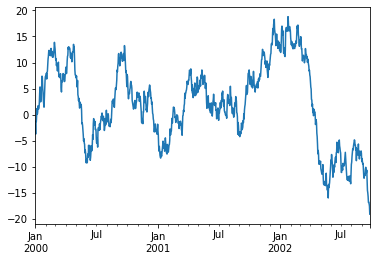

In [ ]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [ ]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

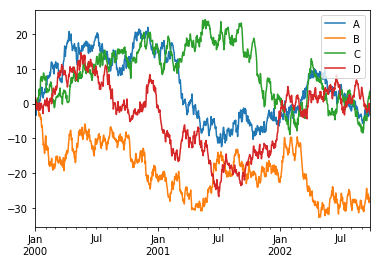

In [ ]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [ ]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [ ]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.658625,-0.290248,0.020163,1.426888
1,2000-01-02,-2.304333,-1.055765,-0.127296,1.714208
2,2000-01-03,-3.437299,-0.912037,1.112706,0.972614
3,2000-01-04,-2.321645,-0.489707,-0.495973,0.021007
4,2000-01-05,-1.984173,-1.319900,-0.288156,0.194988
5,2000-01-06,-0.680627,-1.009155,0.093500,-1.790273
6,2000-01-07,-0.963091,-0.974451,0.936463,-1.049295
7,2000-01-08,-0.750251,-1.424097,0.485715,-0.272128
8,2000-01-09,1.314745,-0.760740,1.629215,0.061405
9,2000-01-10,0.387229,-1.782051,1.371987,-0.500540


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [ ]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [ ]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.658625,-0.290248,0.020163,1.426888
2000-01-02,-2.304333,-1.055765,-0.127296,1.714208
2000-01-03,-3.437299,-0.912037,1.112706,0.972614
2000-01-04,-2.321645,-0.489707,-0.495973,0.021007
2000-01-05,-1.984173,-1.319900,-0.288156,0.194988
2000-01-06,-0.680627,-1.009155,0.093500,-1.790273
2000-01-07,-0.963091,-0.974451,0.936463,-1.049295
2000-01-08,-0.750251,-1.424097,0.485715,-0.272128
2000-01-09,1.314745,-0.760740,1.629215,0.061405
2000-01-10,0.387229,-1.782051,1.371987,-0.500540


## In-class exercises

Analize the data of the JetBrains 2017 Python survey https://www.jetbrains.com/research/python-developers-survey-2017/

* Download raw data from http://jb.gg/pythondevsurvey2017raw
* Read it in pandas
* Visualize the dataset
* Select by label and position
* Drop missing data (NA values)
* Reproduce "What do you use Python for the most? (single answer)" chart

### Reading and loading file in pandas

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/pythondevsurvey2017_raw_data.csv")

In [ ]:
# In class activity work:

#Columns specifically for Python responses
data_py = data.loc[:,data.columns.str.contains(':\xa0What do you use Python for?')]

#List of Python Use Case responses + count of each (initially zero)
headers_resp = [[],[]]
for c in list(data_py):
  headers_resp[0].append(c.replace(':\xa0What do you use Python for?',''))
  headers_resp[1].append(0)

# "What do you use Python for the most?" Count total responses that contain each use case
for i in range(len(headers_resp[0])):
 for resp in data["What do you use Python for the most?"]:
   if str(headers_resp[0][i]) in str(resp) == True:
     headers_resp[[1][i]]+=1

print(headers_resp)

[['Educational purposes', 'Data analysis', 'DevOps / System administration / Writing automation scripts', 'Software testing / Writing automated tests', 'Software prototyping', 'Web development', 'Machine learning', 'Mobile development', 'Desktop development', 'Computer graphics', 'Network programming', 'Game development', 'Multimedia applications development', 'Embedded development', 'Programming of web parsers / scrapers / crawlers', 'Other - Write In:'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


### Visualizing the dataset

In [ ]:
data.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

In [ ]:
data.tail()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

In [ ]:
data.describe()

,How likely is it that you would recommend your main editor to a friend or colleague?
count,7906.000000
mean,8.579433
std,1.744554
min,0.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [ ]:
data.describe(include=['object'])

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"use the debugger:When developing in Python, how often do you…?","refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the following best desc

In [ ]:
data.describe(exclude=np.number)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"use the debugger:When developing in Python, how often do you…?","refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the following best desc

### Selecting by label and position

In [ ]:
# Getting some information about DataFrame before
print("Data size", data.size)
print("\nData shape", data.shape)
print("\nData dimension", data.ndim)

Data size 1539972

Data shape (9506, 162)

Data dimension 2


In [ ]:
data.loc[:,:]

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

In [ ]:
data.loc[15,20] # This will fail, not accepting int

TypeError: ignored

In [ ]:
data.iloc[15,20]

nan

In [ ]:
data.loc[15:45,20:45] #This will fail, we need a string not an integer

TypeError: ignored

In [ ]:
data.iloc[15:45,20:45]

,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,Other - Write In:: What do you use Python for?,What do you use Python for the most?,Which version of Python do you use the most?,Installer from python.org:What do you typically use to upgrade your Python version?,Build from source:What do you typically use to upgrade your Python version?
15,NaN,NaN,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,Web development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web development,Python 3,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web development,Python 3,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DevOps / System administration / Writing autom...,NaN,Software prototyping,Web development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software prototyping,Python 3,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,Educational purposes,Data analysis,NaN,NaN,NaN,NaN,Machine learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other - Write In:,Other - Write In:,Python 2,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,Data analysis,DevOps / System administration / Writing autom...,Software testing / Writing automated tests,NaN,Web development,Machine learning,Mobile development,NaN,NaN,NaN,NaN,Multimedia applications development,NaN,NaN,NaN,Web development,Python 2,NaN,NaN
20,NaN,NaN,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Programming of web parsers / scrapers / crawlers,NaN,Programming of web parsers / scrapers / crawlers,Python 2,NaN,NaN
21,NaN,NaN,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,Web development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web development,Python 2,NaN,NaN
22,NaN,NaN,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,Web development,NaN,NaN,Desktop development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web development,Python 3,NaN,NaN
23,NaN,NaN,NaN,HTML/CSS,NaN,NaN,NaN,DevOps / System administration / Writing autom...,Software testing / Writing automated tests,NaN,Web development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Programming of web parsers / scrapers / crawlers,NaN,Web development,Python 3,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other - Write In:,Other - Write In:,Python 3,NaN,NaN


In [ ]:
data.loc[0:5, 'Groovy:What other language(s) do you use?':'CoffeeScript:What other language(s) do you use?']

,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


### Dropping missing NA values

In [ ]:
data.dropna(how='any')

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

In [ ]:
data.dropna(how='all')

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,Go:What other language(s) do you use?,Visual Basic:What other language(s) do you use?,Scala:What other language(s) do you use?,SQL:What other language(s) do you use?,Kotlin:What other language(s) do you use?,R:What other language(s) do you use?,Swift:What other language(s) do you use?,Clojure:What other language(s) do you use?,Perl:What other language(s) do you use?,Rust:What other language(s) do you use?,Groovy:What other language(s) do you use?,TypeScript:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Other - Write In::What other language(s) do you use?,Educational purposes: What do you use Python for?,Data analysis: What do you use Python for?,DevOps / System administration / Writing automation scripts: What do you use Python for?,Software testing / Writing automated tests: What do you use Python for?,Software prototyping: What do you use Python for?,Web development: What do you use Python for?,Machine learning: What do you use Python for?,Mobile development: What do you use Python for?,Desktop development: What do you use Python for?,Computer graphics: What do you use Python for?,Network programming: What do you use Python for?,Game development: What do you use Python for?,Multimedia applications development: What do you use Python for?,Embedded development: What do you use Python for?,Programming of web parsers / scrapers / crawlers: What do you use Python for?,...,"refactor your code:When developing in Python, how often do you…?","use VCS:When developing in Python, how often do you…?","use code linting (programs that analyze code for potential errors):When developing in Python, how often do you…?","use Python virtual environments for your projects:When developing in Python, how often do you…?","use SQL databases :When developing in Python, how often do you…?","use NoSQL databases:When developing in Python, how often do you…?","run / debug or edit code on remote machines (remote hosts, VMs, etc.):When developing in Python, how often do you…?","use a Python profiler:When developing in Python, how often do you…?","write tests for your code:When developing in Python, how often do you…?","use code coverage:When developing in Python, how often do you…?","use optional type hinting:When developing in Python, how often do you…?","use Continuous Integration tools:When developing in Python, how often do you…?","use Issue Trackers:When developing in Python, how often do you…?",Do you regularly work on multiple projects at the same time?,How did you first learn about your main editor?,How often do you use your main editor?,Are you missing any features in your main editor?,How likely is it that you would recommend your main editor to a friend or colleague?,What do you think is the ratio of these two numbers?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,What do you think would be the most popular opinion?:Please think about the total number of Python Web Developers in the world and the total number of Data Scientists using Python.,"Most of the time, do you...?",How many people are in your project team?,What is your employment status?,Choose one from the list::Which of the following industries best describes your company's business?,Choose one from the list::Which of the following industries do you develop for?,How long have you been working in the IT industry?,DBA:Which of the following best describes your job role(s)?,Architect:Which of the

### Plotting  "What do you use Python for the most? (single answer)" chart

In [ ]:
counts = data["What do you use Python for the most?"].value_counts()
counts.sum()

8112

In [ ]:
len(data)

9506

In [ ]:
(counts / counts.sum()).head()

Web development                                                0.260355
Data analysis                                                  0.176282
Educational purposes                                           0.094058
DevOps / System administration / Writing automation scripts    0.092949
Machine learning                                               0.085799
Name: What do you use Python for the most?, dtype: float64

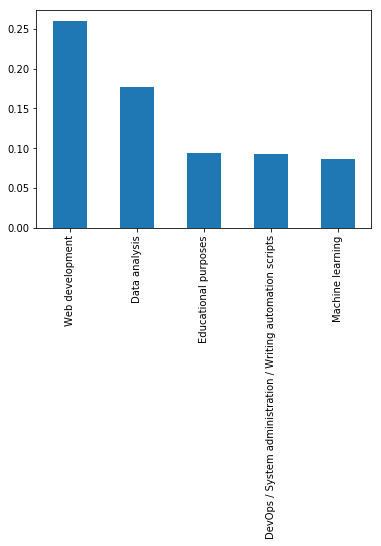

In [ ]:
data["What do you use Python for the most?"].value_counts(normalize=True).head().plot.bar()

### Using loc to sort through the rows 

In [ ]:
selected_sum = data.loc[12:20, "Is Python the main language you use for your current projects?"].value_counts()
selected_sum

Yes                                               5
No, I use Python as a secondary language          3
No, I don’t use Python for my current projects    1
Name: Is Python the main language you use for your current projects?, dtype: int64

In [ ]:
selected_counts = (selected_sum / selected_sum.sum()).head()
selected_counts

Yes                                               0.555556
No, I use Python as a secondary language          0.333333
No, I don’t use Python for my current projects    0.111111
Name: Is Python the main language you use for your current projects?, dtype: float64

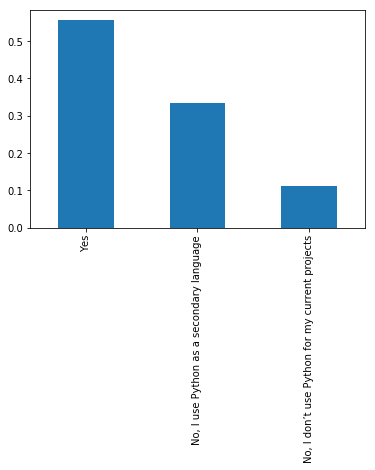

In [ ]:
selected_counts.head().plot.bar()

### Create a plot of some rows direclty by using loc

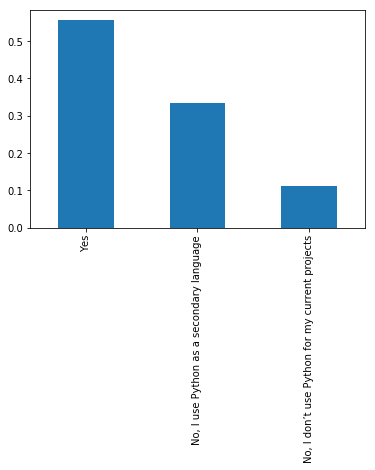

In [ ]:
data.loc[12:20, "Is Python the main language you use for your current projects?"].value_counts(normalize=True).head().plot.bar()

### Usage of iloc to sort through the rows

In [ ]:
data["Is Python the main language you use for your current projects?"].iloc[25:100].value_counts()

Yes                                         70
No, I use Python as a secondary language     5
Name: Is Python the main language you use for your current projects?, dtype: int64

### Get column index by name


In [ ]:
data.columns.get_loc("Is Python the main language you use for your current projects?")

0

### Change NaN values to integer or string

In [ ]:
data["Bash / Shell:What other language(s) do you use?"].fillna(value=0).value_counts()


0               6431
Bash / Shell    3075
Name: Bash / Shell:What other language(s) do you use?, dtype: int64

In [ ]:
data["Bash / Shell:What other language(s) do you use?"].fillna(value="This is a NaN").value_counts()


This is a NaN    6431
Bash / Shell     3075
Name: Bash / Shell:What other language(s) do you use?, dtype: int64

### Change any value to NaN

In [ ]:
data["Is Python the main language you use for your current projects?"].replace('Yes', np.NaN).value_counts()

No, I use Python as a secondary language          1695
No, I don’t use Python for my current projects    1394
Name: Is Python the main language you use for your current projects?, dtype: int64